In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Trabajo final\CreditoHipotecario.dta"

df, meta = st.read_dta(path)
df.head(1)

,seq,s3,s4,s5,s6,s7,s9,s11,s13,s14,s15,s16,s17,s18,s19a,s19b,s19c,s19d,s20,s23a,s24a,s25a,s26a,s27a,s30a,s30c,s31a,s31c,s32,s33,s34,s35,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,netw,uria,rtdum,bd,mi,old,vr,school,chval,dnotown,dprop,deny,pi_ratio,black,hse_inc,loan_val,ccred,mcred,pubrec,denpmi,selfemp,married,single,hischl,probunmp,condo
0,2.0,1.0,1.0,1.0,88.0,1.0,1120.0,0.0,5.0,5.0,2.0,1.0,53.0,8.0,NA,NA,NA,NA,1.0,M,0.0,19.0,19.0,0.0,1938.0,2000.0,2241.0,2000.0,939.0,110.0,0.0,30.0,0.0,0.0,34.0,2.0,5.0,0.0,22.1,22.1,3.0,360.0,NA,110.0,2.0,0.0,0.0,N,0.0,1.0,999999.375,92.0,3.9,0.0,1.0,1.0,1.0,0.0,15.0,206.735489,0.0,0.0,0.0,0.221,0.0,0.221,0.8,5.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3.9,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq       2380 non-null   float64
 1   s3        2380 non-null   float64
 2   s4        2380 non-null   float64
 3   s5        2380 non-null   float64
 4   s6        2380 non-null   float64
 5   s7        2380 non-null   float64
 6   s9        2380 non-null   float64
 7   s11       2380 non-null   float64
 8   s13       2380 non-null   float64
 9   s14       2379 non-null   float64
 10  s15       2380 non-null   float64
 11  s16       2379 non-null   float64
 12  s17       2380 non-null   float64
 13  s18       2265 non-null   float64
 14  s19a      2380 non-null   object 
 15  s19b      2380 non-null   object 
 16  s19c      2380 non-null   object 
 17  s19d      2380 non-null   object 
 18  s20       2380 non-null   float64
 19  s23a      2380 non-null   object 
 20  s24a      2380 non-null   floa

In [12]:
df[['deny', 'pi_ratio']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   deny      2380 non-null   float64
 1   pi_ratio  2380 non-null   float64
dtypes: float64(2)
memory usage: 37.3 KB


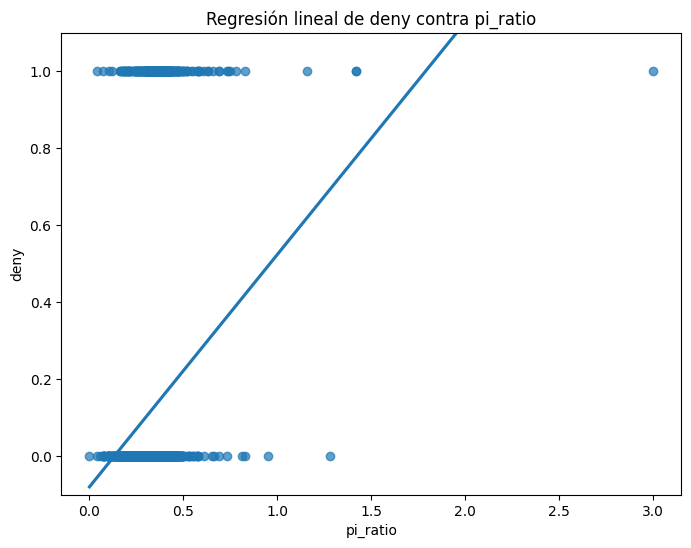

In [22]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='pi_ratio', y='deny', data=df, ci=None, scatter_kws={'alpha': 0.7})

# Personalización
plt.xlabel('pi_ratio')
plt.ylabel('deny')
plt.title('Regresión lineal de deny contra pi_ratio')

# Limitar el eje Y de 0 a 1
plt.ylim(-0.1, 1.1)

plt.show()

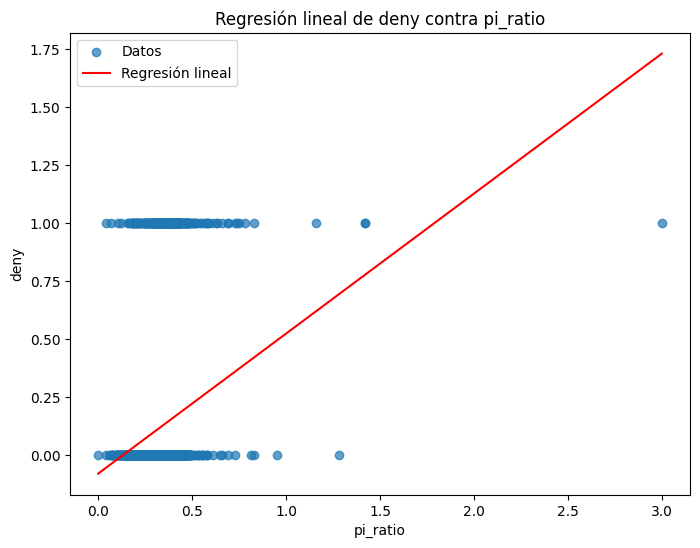

In [18]:
# Ajuste de una regresión lineal usando numpy
m, b = np.polyfit(df['pi_ratio'], df['deny'], 1)  # Coeficientes de la regresión

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['pi_ratio'], df['deny'], alpha=0.7, label='Datos')

# Línea de regresión
x_vals = np.linspace(df['pi_ratio'].min(), df['pi_ratio'].max(), 100)
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='red', label='Regresión lineal')

# Personalización
plt.xlabel('pi_ratio')
plt.ylabel('deny')
plt.title('Regresión lineal de deny contra pi_ratio')
plt.legend()
plt.show()